In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class RumorRouting:
    def __init__(self, graph):
        self.graph = graph
        self.time_spent = 0
        self.energy_spent = 0

    def simulate(self, start_node):
        self.time_spent = 0
        self.energy_spent = 0

        # Initialize all nodes as uninfected
        infected_nodes = set()
        for node in self.graph.nodes():
            self.graph.nodes[node]['infected'] = False

        # Select the start node to be infected
        infected_nodes.add(start_node)
        self.graph.nodes[start_node]['infected'] = True

        # Iterate until all nodes are infected
        while len(infected_nodes) < len(self.graph):
            # Select a random infected node
            sender = random.choice(list(infected_nodes))

            # Select a random neighbor to forward the rumor to
            neighbor = random.choice(list(self.graph.neighbors(sender)))

            # If the neighbor is uninfected, infect it and add it to the set of infected nodes
            if not self.graph.nodes[neighbor]['infected']:
                self.graph.nodes[neighbor]['infected'] = True
                infected_nodes.add(neighbor)


            # Increment the time spent
            self.time_spent += 1
            self.energy_spent += 1
            # Plot the current state of the graph
            self.plot_step(sender, neighbor, self.time_spent)

        # Return the time and energy spent
        return {'time_spent': self.time_spent, 'energy_spent': self.energy_spent}

    def plot_step(self, sender, receiver,temp):
        # Draw the graph
        pos = nx.spring_layout(self.graph, seed=42)
        nx.draw(self.graph, pos, with_labels=True)

        # Label the infected nodes in red
        infected_nodes = [node for node, attr in self.graph.nodes(data='infected') if attr == True]
        nx.draw_networkx_nodes(self.graph, pos, nodelist=infected_nodes, node_color='r')

        # Label the sender and receiver nodes in green and yellow, respectively
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[sender], node_color='g')
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[receiver], node_color='y')

        # Add a label for the time spent and energy spent
        plt.rcParams['figure.figsize'] = [15,15 ]
        # plt.text(-1, -1, f"Time spent: {self.time_spent}\nEnergy Spent: {self.energy_spent}\nInfected Nodes:{infected_nodes}\n", fontsize=20)

        # Show the plot
        # plt.savefig(f'/content/drive/MyDrive/Colab_Notebooks/Images_Net/First{temp}.png')
        # plt.show()



Time spent: 183
Energy spent: 183
Time spent: 249
Energy spent: 249
Time spent: 267
Energy spent: 267
Time spent: 104
Energy spent: 104
Time spent: 256
Energy spent: 256
Time spent: 295
Energy spent: 295
Time spent: 278
Energy spent: 278
Time spent: 347
Energy spent: 347
Time spent: 330
Energy spent: 330
Time spent: 310
Energy spent: 310


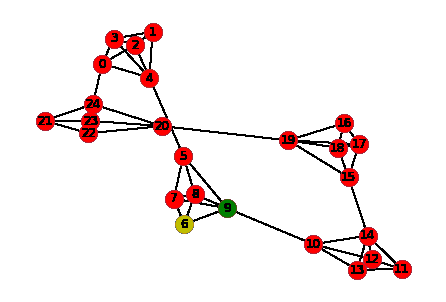

In [ ]:
res_time1 = [0]*10
res_en1 = [0]*10
for i in range(10):
# Create a random graph with 10 nodes and 20 edges
  graph = nx.connected_caveman_graph(5, 5)

  # Create a RumorRouting object
  rumor_routing = RumorRouting(graph)

  # Simulate the rumor routing protocol starting from node 0
  rumor_results = rumor_routing.simulate(0)

  # Print the time and energy spent
  print(f"Time spent: {rumor_results['time_spent']}")
  print(f"Energy spent: {rumor_results['energy_spent']}")
  res_time1[i]={rumor_results['time_spent']}
  res_en1[i]={rumor_results['energy_spent']}


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


class EpidemicRouting:
    def __init__(self, graph, max_hops=10):
        self.graph = graph
        self.time_spent = 0
        self.energy_spent = 0
        self.max_hops = max_hops

    def simulate(self, start_node):
        self.time_spent = 0
        self.energy_spent = 0

        # Initialize all nodes as uninfected
        infected_nodes = set()
        for node in self.graph.nodes():
            self.graph.nodes[node]['infected'] = False

        # Select the start node to be infected
        infected_nodes.add(start_node)
        self.graph.nodes[start_node]['infected'] = True

        # Iterate until all nodes are infected
        while len(infected_nodes) < len(self.graph):
            # Select a random infected node
            sender = random.choice(list(infected_nodes))

            # Select a random neighbor to forward the message to
            neighbor = random.choice(list(self.graph.neighbors(sender)))
            # If the neighbor is uninfected, infect it and add it to the set of infected nodes
            if not self.graph.nodes[neighbor]['infected']:
                self.graph.nodes[neighbor]['infected'] = True
                infected_nodes.add(neighbor)


            # Increment the time spent
            self.time_spent += 1
            self.energy_spent += neighbor
            # Forward the message to other nodes within max_hops
            hops = 0
            while hops < self.max_hops:
                # Select a random neighbor to forward the message to
                neighbor = random.choice(list(self.graph.neighbors(sender)))

                # If the neighbor is uninfected, infect it and add it to the set of infected nodes
                if not self.graph.nodes[neighbor]['infected']:
                    self.graph.nodes[neighbor]['infected'] = True
                    infected_nodes.add(neighbor)
                    # self.energy_spent += 1

                # Increment the time spent and hops
                self.time_spent += 1
                hops += 1

            # Plot the current state of the graph
            self.plot_step(sender, neighbor,self.time_spent)

        # Return the time and energy spent
        return {'time_spent': self.time_spent, 'energy_spent': self.energy_spent}

    def plot_step(self, sender, receiver,temp):
        # Draw the graph
        pos = nx.spring_layout(self.graph, seed=42)
        nx.draw(self.graph, pos, with_labels=True)

        # Label the infected nodes in red
        infected_nodes = [node for node, attr in self.graph.nodes(data='infected') if attr == True]
        nx.draw_networkx_nodes(self.graph, pos, nodelist=infected_nodes, node_color='r')

        # Label the sender and receiver nodes in green and yellow, respectively
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[sender], node_color='g')
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[receiver], node_color='y')

        # Add a label for the time spent and energy spent
        plt.rcParams['figure.figsize'] = [15,15 ]
        plt.text(-1, -1, f"Time spent: {self.time_spent/11}\nEnergy spent: {self.energy_spent}\nInfected Nodes:{infected_nodes}\n", fontsize=10)

        # Show the plot
        # plt.savefig(f'/content/drive/MyDrive/Colab_Notebooks/Images_Net2/Second{temp}.png')
        # plt.show()


Time spent: (82.0)
Energy spent: 921
Time spent: (75.0)
Energy spent: 733
Time spent: (62.0)
Energy spent: 710
Time spent: (44.0)
Energy spent: 444
Time spent: (49.0)
Energy spent: 494
Time spent: (77.0)
Energy spent: 907
Time spent: (43.0)
Energy spent: 519
Time spent: (67.0)
Energy spent: 872
Time spent: (51.0)
Energy spent: 624
Time spent: (34.0)
Energy spent: 280


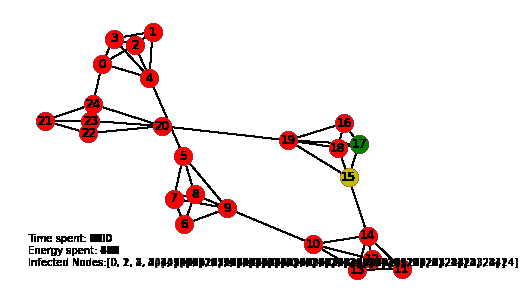

In [ ]:
res_time2 = [0]*10
res_en2 =[0]*10
for i in range(10):
  # Create a random graph with 10 nodes and 20 edges
  graph = nx.connected_caveman_graph(5, 5)

  # Create a EpidemicRouting object
  epidemic_routing = EpidemicRouting(graph)

  # Simulate the epidemic routing protocol starting from node 0
  epidemic_results = epidemic_routing.simulate(0)

  # Print the time and energy spent
  print(f"Time spent: ({epidemic_results['time_spent']/11})")
  print(f"Energy spent: {epidemic_results['energy_spent']}")
  res_time2[i]={epidemic_results['time_spent']/11}
  res_en2[i]={epidemic_results['energy_spent']}


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt


class SprayAndWait:
    def __init__(self, graph, max_copies):
        self.graph = graph
        self.max_copies = max_copies
        self.time_spent = 0
        self.energy_spent = 0

    def simulate(self, start_node):
        self.time_spent = 0
        self.energy_spent = 0

        # Initialize all nodes as uninfected
        infected_nodes = set()
        for node in self.graph.nodes():
            self.graph.nodes[node]['infected'] = False
            self.graph.nodes[node]['copies'] = set()

        # Select the start node to be infected
        infected_nodes.add(start_node)
        self.graph.nodes[start_node]['infected'] = True
        self.graph.nodes[start_node]['copies'].add(0)

        # Iterate until all nodes are infected
        while len(infected_nodes) < len(self.graph):
            # Select a random infected node
            sender = random.choice(list(infected_nodes))

            # Select a random neighbor to forward the rumor to
            neighbor = random.choice(list(self.graph.neighbors(sender)))

            # If the neighbor is uninfected, infect it and add it to the set of infected nodes
            if not self.graph.nodes[neighbor]['infected']:
                self.graph.nodes[neighbor]['infected'] = True
                infected_nodes.add(neighbor)
                self.graph.nodes[neighbor]['copies'].add(0)
                # self.energy_spent += 1

            # If the neighbor has less than the maximum number of copies, create a copy of the message and forward it
            elif len(self.graph.nodes[neighbor]['copies']) < self.max_copies:
                copies = self.graph.nodes[neighbor]['copies']
                copy_id = max(copies) + 1 if copies else 0
                self.graph.nodes[neighbor]['copies'].add(copy_id)


            # Increment the time spent
            self.time_spent += 1
            self.energy_spent += neighbor
            # Plot the current state of the graph
            self.plot_step(sender, neighbor,self.time_spent)

        # Return the time and energy spent
        return {'time_spent': self.time_spent, 'energy_spent': self.energy_spent}

    def plot_step(self, sender, receiver, temp):
        # Draw the graph
        pos = nx.spring_layout(self.graph, seed=42)
        nx.draw(self.graph, pos, with_labels=True)

        # Label the infected nodes in red
        infected_nodes = [node for node, attr in self.graph.nodes(data='infected') if attr == True]
        nx.draw_networkx_nodes(self.graph, pos, nodelist=infected_nodes, node_color='r')

        # Label the sender and receiver nodes in green and yellow, respectively
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[sender], node_color='g')
        nx.draw_networkx_nodes(self.graph, pos, nodelist=[receiver], node_color='y')

        # Add a label for the time spent and energy spent
        plt.rcParams['figure.figsize'] = [15,15 ]
        plt.text(-1, -1, f"Time spent: {self.time_spent}\nEnergy spent: {self.energy_spent}\nInfected Nodes:{infected_nodes}\n", fontsize=10)
        # plt.savefig(f'/content/drive/MyDrive/Colab_Notebooks/Images_Net3/Third{temp}.png')
        # # Show the plot
        # plt.show()


Time spent: (126)
Energy spent: 1359
Time spent: (204)
Energy spent: 2107
Time spent: (96)
Energy spent: 884
Time spent: (196)
Energy spent: 1696
Time spent: (191)
Energy spent: 1653
Time spent: (257)
Energy spent: 3541
Time spent: (168)
Energy spent: 2056
Time spent: (208)
Energy spent: 3079
Time spent: (105)
Energy spent: 997
Time spent: (246)
Energy spent: 2621


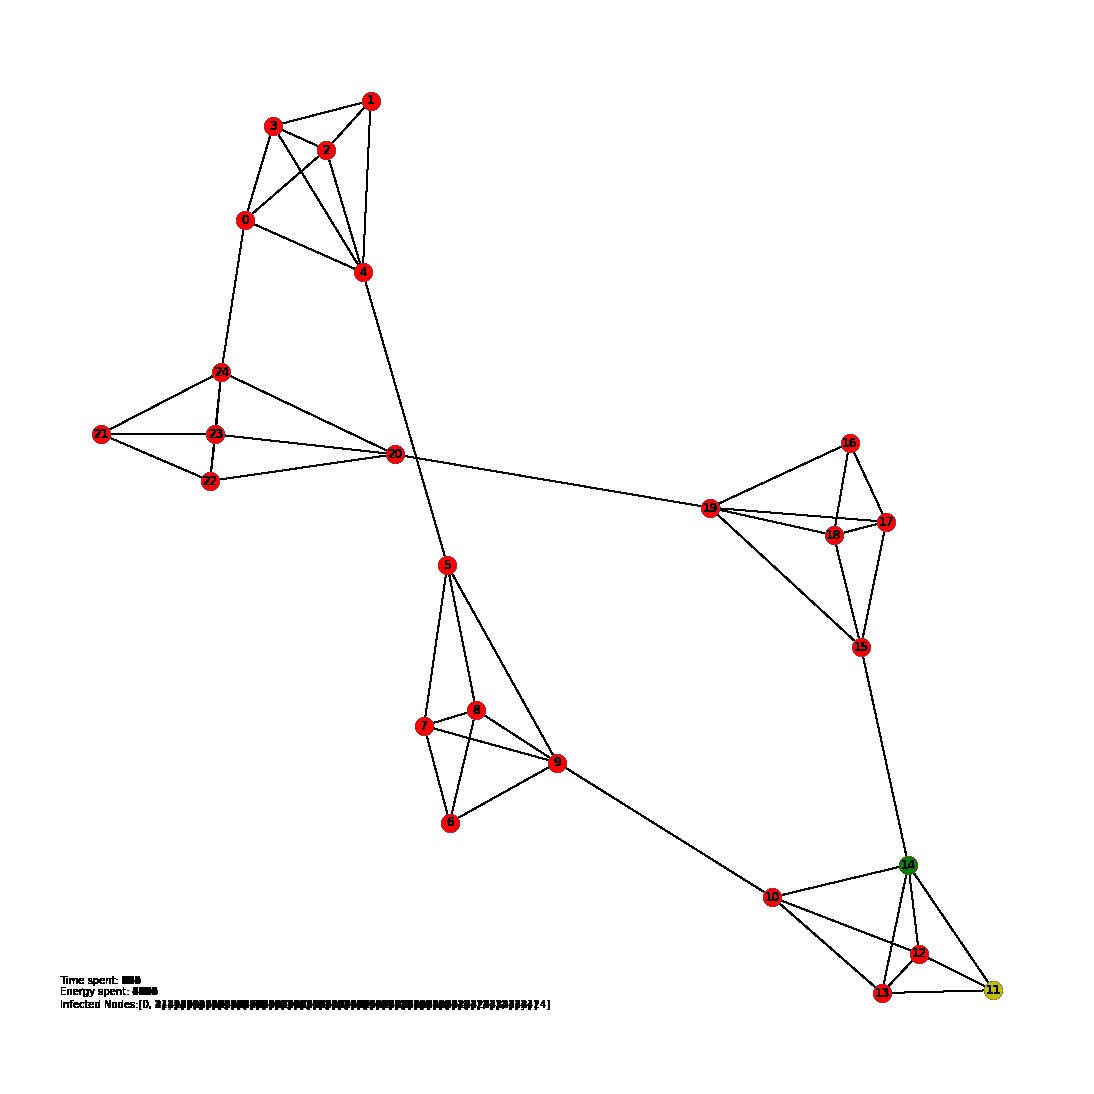

In [ ]:
res_time3 = [0]*10
res_en3= [0]*10
for i in range(10):
  # Create a random graph with 10 nodes and 20 edges
  # graph = nx.gnm_random_graph(15, 105, seed=42)
  graph = nx.connected_caveman_graph(5, 5)

  # Create a EpidemicRouting object
  spray_routing = SprayAndWait(graph,8)

  # Simulate the epidemic routing protocol starting from node 0
  spray_results = spray_routing.simulate(0)

  # Print the time and energy spent
  print(f"Time spent: ({spray_results['time_spent']})")
  print(f"Energy spent: {spray_results['energy_spent']}")
  res_time3[i]={spray_results['time_spent']}
  res_en3[i]={spray_results['energy_spent']}

In [ ]:
res_time1=[55, 50, 77, 32, 52, 39, 31, 42, 63, 51]


In [ ]:
res_time2=[7, 5, 4, 4, 3, 4, 5, 5, 6, 6]


In [ ]:
res_time3=[49, 44, 34, 36, 35, 59, 51, 34, 43, 58]


In [ ]:
res_en1=[55, 50, 77, 32, 52, 39, 31, 42, 63, 51]


In [ ]:
res_en2=[54, 40, 45, 27, 38, 31, 47, 27, 50, 40]


In [ ]:
res_en3=[341, 342, 234, 243, 240, 364, 373, 208, 292, 396]


<ipython-input-33-180062e79fa2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label_list)


<ErrorbarContainer object of 3 artists>

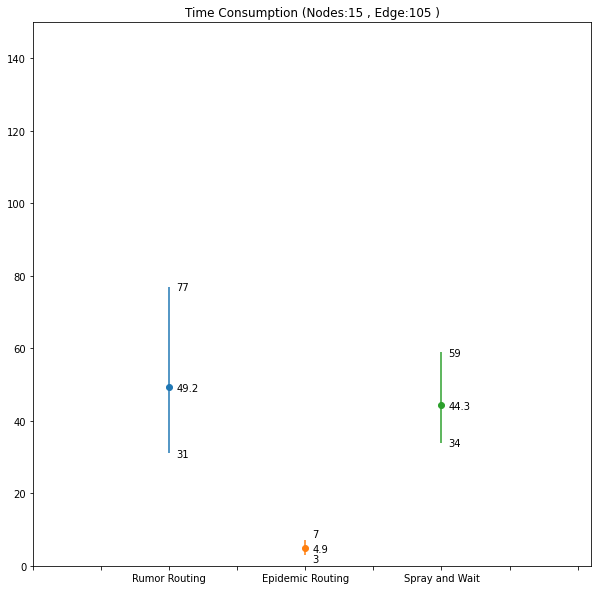

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10,10]
plt.title("Time Consumption (Nodes:15 , Edge:105 )")
x_label_list = [" "," ","Rumor Routing"," ", "Epidemic Routing"," ", "Spray and Wait"]
ax = plt.gca()
ax.set_xticklabels(x_label_list)
plt.xlim([-1, 3.1])
plt.ylim([0, 150])
plt.text(+0.05, np.mean(res_time1)-1,np.mean(res_time1), fontsize=10)
plt.text(+0.05, np.min(res_time1)-1,np.min(res_time1), fontsize=10)
plt.text(+0.05, np.max(res_time1)-1,np.max(res_time1), fontsize=10)
xxx=np.mean(res_time1)-np.min(res_time1)
yyy=np.max(res_time1)-np.mean(res_time1)
err=[[xxx],[yyy]]
plt.errorbar(0, np.mean(res_time1), yerr=err, fmt="o")

plt.xlim([-1, 3.1])
plt.ylim([0, 150])
plt.text(1+0.05, np.mean(res_time2)-1,np.mean(res_time2), fontsize=10)
plt.text(1+0.05, np.min(res_time2)-2,np.min(res_time2), fontsize=10)
plt.text(1+0.05, np.max(res_time2)+1,np.max(res_time2), fontsize=10)
xxx=np.mean(res_time2)-np.min(res_time2)
yyy=np.max(res_time2)-np.mean(res_time2)
err=[[xxx],[yyy]]
plt.errorbar(1, np.mean(res_time2), yerr=err, fmt="o")

plt.xlim([-1, 3.1])
plt.ylim([0, 150])
plt.text(2+0.05, np.mean(res_time3)-1,np.mean(res_time3), fontsize=10)
plt.text(2+0.05, np.min(res_time3)-1,np.min(res_time3), fontsize=10)
plt.text(2+0.05, np.max(res_time3)-1,np.max(res_time3), fontsize=10)
xxx=np.mean(res_time3)-np.min(res_time3)
yyy=np.max(res_time3)-np.mean(res_time3)
err=[[xxx],[yyy]]
plt.errorbar(2, np.mean(res_time3), yerr=err, fmt="o")


<ipython-input-32-68d0a2bbce4d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_label_list)


<ErrorbarContainer object of 3 artists>

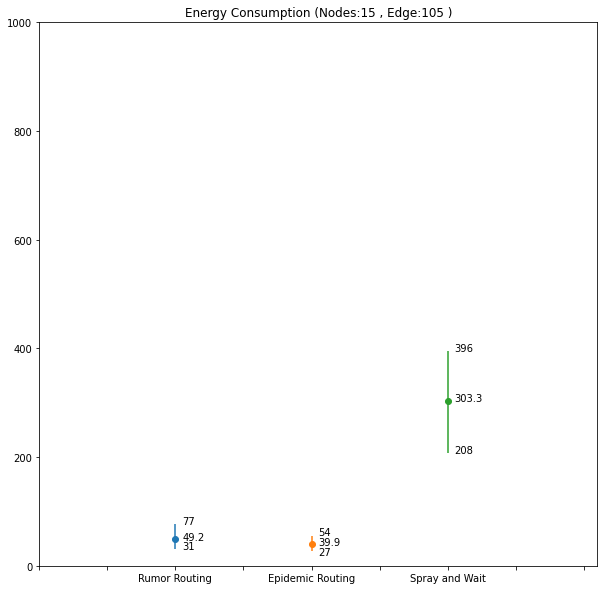

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10,10]
plt.title("Energy Consumption (Nodes:15 , Edge:105 )")
x_label_list = [" "," ","Rumor Routing"," ", "Epidemic Routing"," ", "Spray and Wait"]
ax = plt.gca()
ax.set_xticklabels(x_label_list)
plt.xlim([-1, 3.1])
plt.ylim([0, 1000])
plt.text(+0.05, np.mean(res_en1)-1,np.mean(res_en1), fontsize=10)
plt.text(+0.05, np.min(res_en1)-1,np.min(res_en1), fontsize=10)
plt.text(+0.05, np.max(res_en1)-1,np.max(res_en1), fontsize=10)
xxx=np.mean(res_en1)-np.min(res_en1)
yyy=np.max(res_en1)-np.mean(res_en1)
err=[[xxx],[yyy]]
plt.errorbar(0, np.mean(res_en1), yerr=err, fmt="o")

plt.xlim([-1, 3.1])
plt.ylim([0, 1000])
plt.text(1+0.05, np.mean(res_en2)-1,np.mean(res_en2), fontsize=10)
plt.text(1+0.05, np.min(res_en2)-7,np.min(res_en2), fontsize=10)
plt.text(1+0.05, np.max(res_en2)+2,np.max(res_en2), fontsize=10)
xxx=np.mean(res_en2)-np.min(res_en2)
yyy=np.max(res_en2)-np.mean(res_en2)
err=[[xxx],[yyy]]
plt.errorbar(1, np.mean(res_en2), yerr=err, fmt="o")

plt.xlim([-1, 3.1])
plt.ylim([0, 1000])
plt.text(2+0.05, np.mean(res_en3)-1,np.mean(res_en3), fontsize=10)
plt.text(2+0.05, np.min(res_en3)-1,np.min(res_en3), fontsize=10)
plt.text(2+0.05, np.max(res_en3)-1,np.max(res_en3), fontsize=10)
xxx=np.mean(res_en3)-np.min(res_en3)
yyy=np.max(res_en3)-np.mean(res_en3)
err=[[xxx],[yyy]]
plt.errorbar(2, np.mean(res_en3), yerr=err, fmt="o")


In [ ]:
np.min(res_time1)

48

In [ ]:
np.max(res_time1)

82